In [1]:
#import cv2

import numpy as np
import numpy.fft as fft
import matplotlib as mpl

import matplotlib.pyplot as plt

%matplotlib inline
mpl.rcParams['figure.figsize'] = (12, 5)
mpl.rcParams['image.cmap'] = "gray"

# Plotting 1D Fourier Spectra

## Simple 1D Waveform

In [2]:
N = 1<<12 # number of samples
x = np.linspace(-np.pi/2, np.pi/2, N)

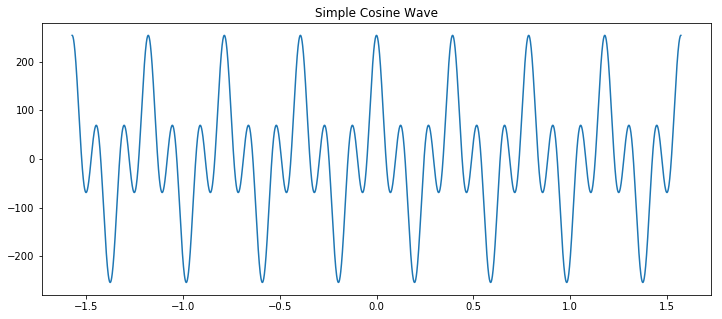

In [3]:
# Define amplitude, frequency, and phase of a 1-D cosine wave

A = 127
f_ = 16
f = 2*np.pi*f_
phi = 0
y = A * np.cos(f_ * x + phi)+ A * np.cos(f_ * x * 3 + phi)
plt.plot(x, y); plt.title('Simple Cosine Wave');

### Plotting Real & Imaginary Parts of 1D FFT

In [4]:
Y = fft.fft(y)
print(Y)
print(len(Y))

[ 254.00000000+0.j          256.23553426+0.19653023j
  263.34951977+0.40397342j ...,  276.78390899-0.63687292j
  263.34951977-0.40397342j  256.23553426-0.19653023j]
4096


In [5]:
fft.fftfreq(N)

array([ 0.        ,  0.00024414,  0.00048828, ..., -0.00073242,
       -0.00048828, -0.00024414])

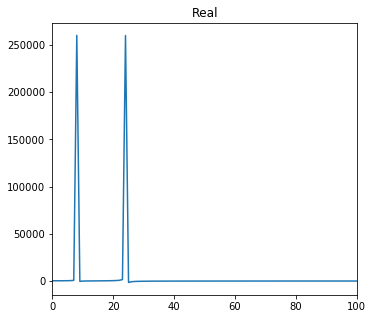

In [6]:

plt.subplot(1,2,1)
#plt.plot(fft.fftfreq(N), Y.real); plt.xlim(-np.pi/32, np.pi/32); plt.title('Real');
plt.plot(Y.real);plt.xlim(0, 100);plt.title('Real');
#plt.subplot(1,2,2)
#plt.plot(fft.fftfreq(N), Y.imag); plt.xlim(-np.pi/32, np.pi/32); plt.title('Imaginary');

### FFT "Standard" Order

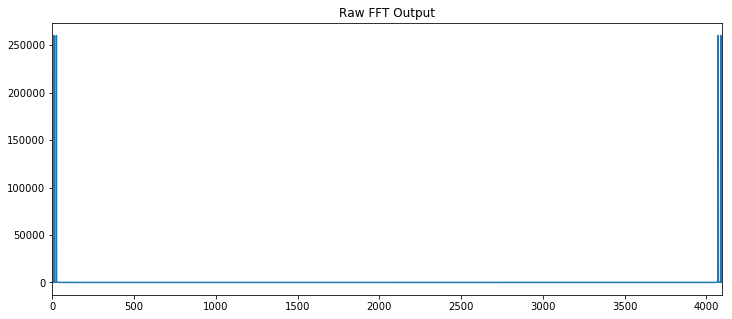

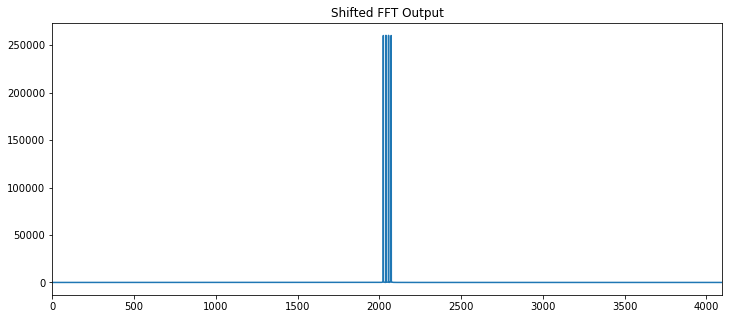

In [7]:
Y = fft.fft(y)
plt.plot(np.abs(Y)); plt.xlim(0,N); plt.title('Raw FFT Output');
plt.figure();
plt.plot(np.abs(fft.fftshift(Y))); plt.xlim(0,N); plt.title('Shifted FFT Output');

### Plotting 1D FFT Magnitude

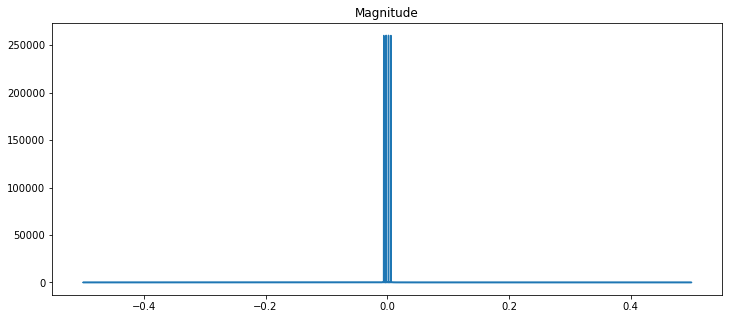

In [8]:
plt.plot(fft.fftfreq(N), np.abs(Y)); plt.title('Magnitude');

## Mixed Sinusoid

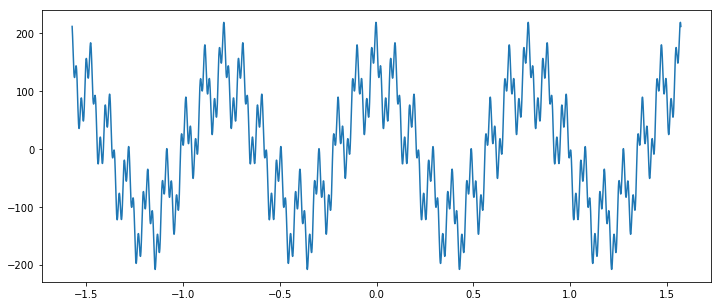

In [9]:
# Define amplitude, frequency, and phase of a 1-D cosine wave
A = [127, 63, 31]
F = [8, 64, 256]
Phi = [0, np.pi/8, np.pi/6]
y = np.sum([a * np.cos(f * x + phi) for a, f, phi in zip(A, F, Phi)], axis=0)
plt.plot(x, y);

### Plotting Real & Imaginary Parts of 1D FFT

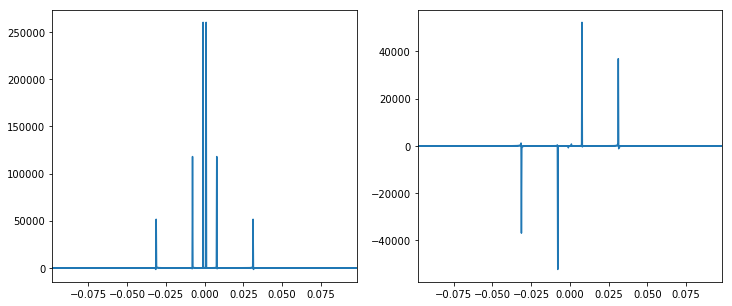

In [10]:
Y = fft.fft(y)
plt.subplot(1,2,1)
plt.plot(fft.fftfreq(N), Y.real); plt.xlim(-np.pi/32, np.pi/32);
plt.subplot(1,2,2)
plt.plot(fft.fftfreq(N), Y.imag); plt.xlim(-np.pi/32, np.pi/32);

### Plotting 1D FFT Magnitude

In [11]:
plt.plot(fft.fftfreq(N)[:N/2], np.abs(Y)[:N/2]); plt.title('Magnitude');

TypeError: slice indices must be integers or None or have an __index__ method

# Plotting 2D Spectra

## Simple 2D Waveform

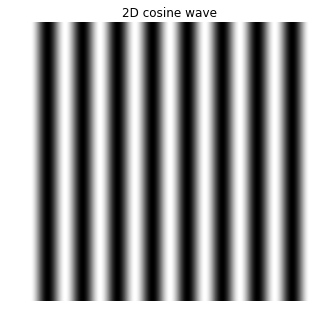

In [10]:
N = 512  # number of samples
x = np.linspace(-np.pi/2, np.pi/2, N)
A = 127
f = 16
phi = 0
y = A * np.cos(f * x + phi)
img = np.repeat(y, N).reshape(N, N).T * 255
plt.imshow(img); plt.axis('off'); plt.title('2D cosine wave');

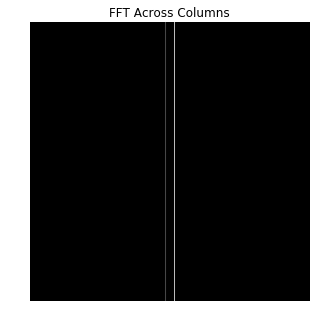

In [11]:
_img = fft.fft(img, axis=1)
_mag = np.abs(fft.fftshift(_img))
plt.imshow(_mag); plt.axis('off'); plt.title('FFT Across Columns');

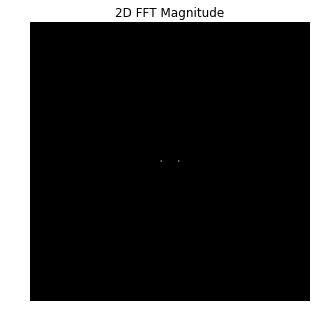

In [12]:
Img = fft.fft(_img, axis=0)
mag = np.abs(fft.fftshift(Img))
plt.imshow(mag); plt.xlim(128,384); plt.ylim(128,384); plt.axis('off'); plt.title('2D FFT Magnitude');

### 2D FFT Equivalence: FFT(FFT()) == FFT2

In [14]:
np.allclose(fft.fft2(img), fft.fft(fft.fft(img, axis=1), axis=0)) 

True

### Power Spectrum

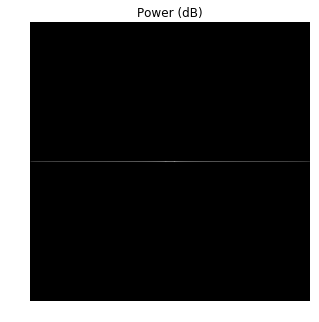

In [15]:
plt.imshow(20*np.log10(np.abs(fft.fftshift(Img))**2 + 1)); plt.axis('off'); plt.title('Power (dB)');

### Complicated 2D Waveform

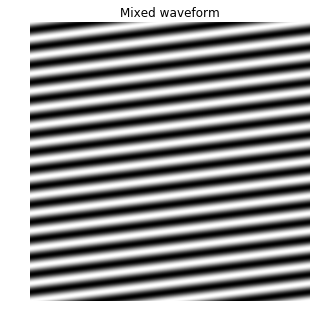

In [22]:
fx = 4
fy = 32
_img = np.cos(fx * x[np.newaxis, :] + fy * x[:, np.newaxis])*255
plt.imshow(_img); plt.axis('off'); plt.title('Mixed waveform');

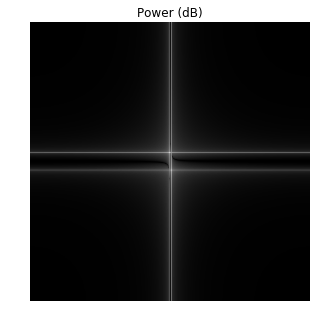

In [23]:
Img = fft.fft2(_img)
mag = np.abs(fft.fftshift(Img))
plt.imshow(20*np.log10(mag**2 + 1)); plt.axis('off'); plt.title('Power (dB)');

## Real Images

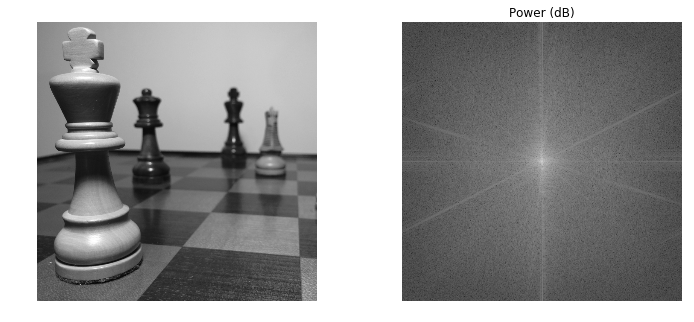

In [24]:
real_img = cv2.imread('test.png', cv2.IMREAD_GRAYSCALE)
Img = fft.fft2(real_img)
mag = np.abs(fft.fftshift(Img))
plt.subplot(1,2,1)
plt.imshow(real_img); plt.axis('off');
plt.subplot(1,2,2)
plt.imshow(20*np.log10(mag**2 + 1)); plt.axis('off'); plt.title('Power (dB)');

### Central Lines

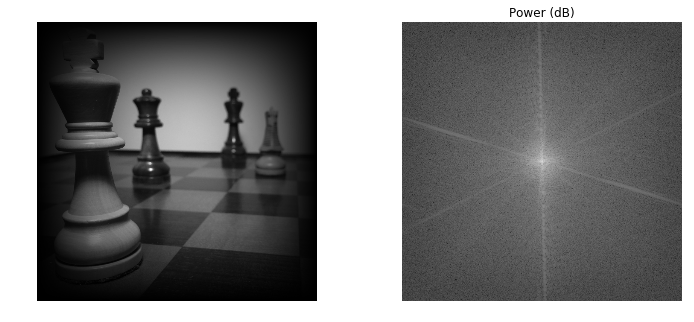

In [25]:
x = np.linspace(-np.pi/2, np.pi/2, real_img.shape[0])
y = np.linspace(-np.pi/2, np.pi/2, real_img.shape[1])
wx = np.cos(x)[np.newaxis, :]
wy = np.cos(y)[:, np.newaxis]
w_img = wx * wy * real_img
_Img = fft.fft2(w_img)
mag = np.abs(fft.fftshift(_Img))
plt.subplot(1,2,1)
plt.imshow(w_img); plt.axis('off');
plt.subplot(1,2,2)
plt.imshow(20*np.log10(mag**2 + 1)); plt.axis('off'); plt.title('Power (dB)');

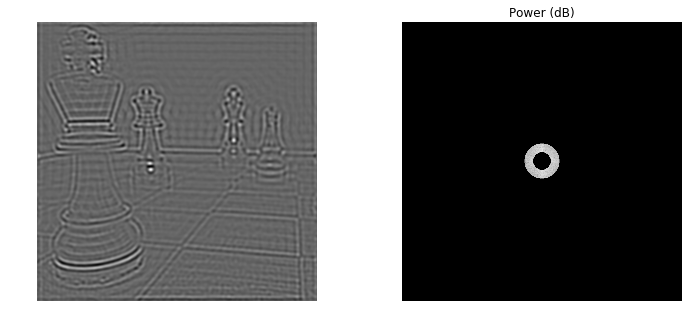

In [28]:
x, y = np.meshgrid(range(real_img.shape[0]), range(real_img.shape[1]))
r = np.sqrt((x - x.mean())**2 + (y - y.mean())**2)
_Img = np.where((r > 32) & (r < 64), fft.fftshift(Img), 0)
mag = np.abs(_Img)
plt.subplot(1,2,1)
plt.imshow(fft.ifft2(fft.fftshift(_Img)).real); plt.axis('off');
plt.subplot(1,2,2)
plt.imshow(20*np.log10(mag**2 + 1)); plt.axis('off'); plt.title('Power (dB)');